(200, 200)


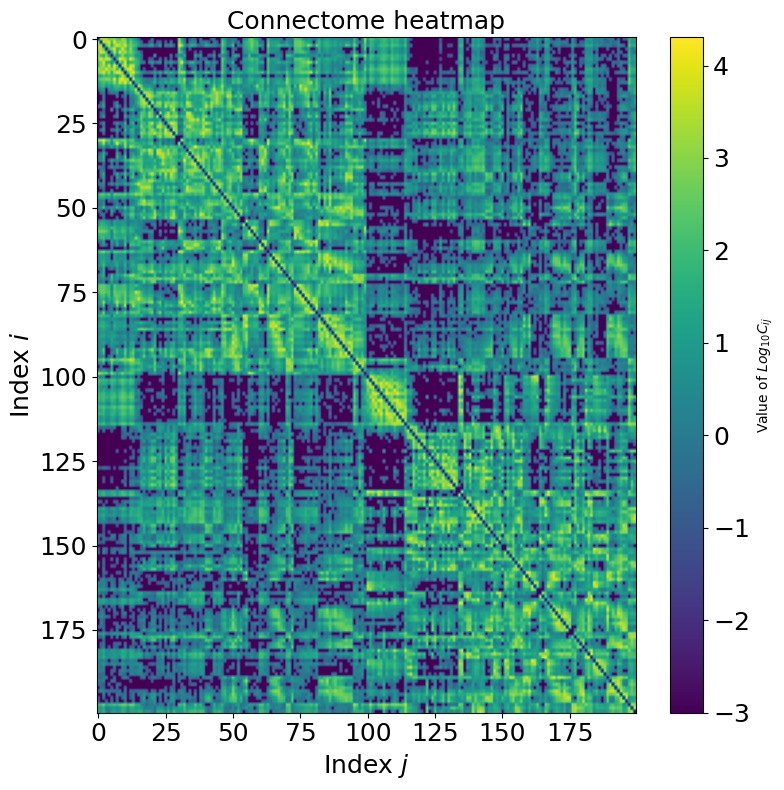

In [5]:
#simulazione WILSON-COWAN MODEL 
#prima importiamo i file di interesse estratti dal Human connectome project 
import numpy as np
import matplotlib.pyplot as plt 

#importo i dati 
data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")


print(data.shape) #verifico la struttura matriciale 

#plotting della matrice strutturale 
plt.figure(figsize= (8,8)) #costruisco l'ambiente di plotting 
plt.imshow(  np.log10(data+0.001) , aspect='auto', cmap='viridis', origin='upper')
# procedura per dimensioni del font 
cbar = plt.colorbar(label='Value of $Log_{10}C_{ij}$')

cbar.ax.tick_params(labelsize=18)     
cbar.set_label('Value of $Log_{10}C_{ij}$')
plt.title('Connectome heatmap', fontsize=18)
plt.xlabel('Index $j$', fontsize=18)
plt.ylabel('Index $i$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

plt.show()

In [ ]:
import scipy as sp

In [ ]:
sp.linalg.issymmetric(data)

In [ ]:
#visualizzazione su cervello delle aree attive, installazione pacchetto per avere il dataset delle coordinate dove vi sono attività
!pip install nilearn

In [ ]:
from nilearn import datasets, plotting
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)

# Ottieni le coordinate dei centroidi delle regioni
coords = plotting.find_parcellation_cut_coords(labels_img=atlas.maps)
plotting.view_connectome(np.log10(data+0.001), coords, title="Functional Connectivity")
#printing dei dati reali e loro disposizione su ambiente neurale

In [2]:
#estrazione autovalori ed autovettori 
eigvals, eigvecs= np.linalg.eig(data)
data_norm = data/np.max(np.real(eigvals))

#calcolo della matrice laplaciana: ci conferisce la struttura matriciale avendo noramlizzato non abbiamo strenght
L= -np.diag(np.sum(data_norm, axis=1)) + data_norm  #controllare se la aggiunta è corretta per migliorare la visibilità
#print(L)

In [ ]:
plotting.view_connectome(L, coords, title='Laplacian') #plotting della matrice riscalata 

In [3]:
# analisi della dinamica 
# costruzione delle funzioni della dinamica

# costruzione della funzione di attivazione 
def F(s) : 
    return 1/(1+np.exp(-s))

# prima si necessita di una costruzione della funzione per la dinamica 

# studio della dinamica 
def simulate_dynamics(N):
    x = np.zeros((num_steps, N)) #costruisco le serie temporali, qua vogliamo da un lato il tempo dall'altro le regioni 
    y = np.zeros((num_steps, N))
    
    # partenza dal punto fisso 
    x[0, :] = np.random.rand(N)
    y[0, :] = np.random.rand(N)
    
    for t in range(1, num_steps):
        for i in range(N):
            s_x = -r * (y[t-1, i] - p) + np.sum(L[i, :] * x[t-1, :]) - np.sum(L[i, :] * y[t-1, :])   #input lungo x 
            s_y = r * (x[t-1, i] - 1 + p) + np.sum(L[i, :] * x[t-1, :]) - np.sum(L[i, :] * y[t-1, :])
        
            F_sx = 2 * (1 - p) * F(s_x)  # descrizione della funzione di attivazione 
            F_sy = 2 * p * F(s_y)
        
            xi_x = np.random.normal(0, 1)  
            xi_y = np.random.normal(0, 1)  
        
            x_noise = (1 / np.sqrt(V)) * np.sqrt(max(0, x[t-1, i] + F_sx)) * xi_x * np.sqrt(dt) # rumore (termine centrale mima l'attività neurale)
            y_noise = (1 / np.sqrt(V)) * np.sqrt(max(0, y[t-1, i] + F_sy)) * xi_y * np.sqrt(dt)
            # aumentando la attività del neurone si porta dietro più rumore
        
            x[t, i] = x[t-1, i] + dt * (F_sx - x[t-1, i]) + x_noise  
            y[t, i] = y[t-1, i] + dt * (F_sy - y[t-1, i]) + y_noise
            
    return x, y


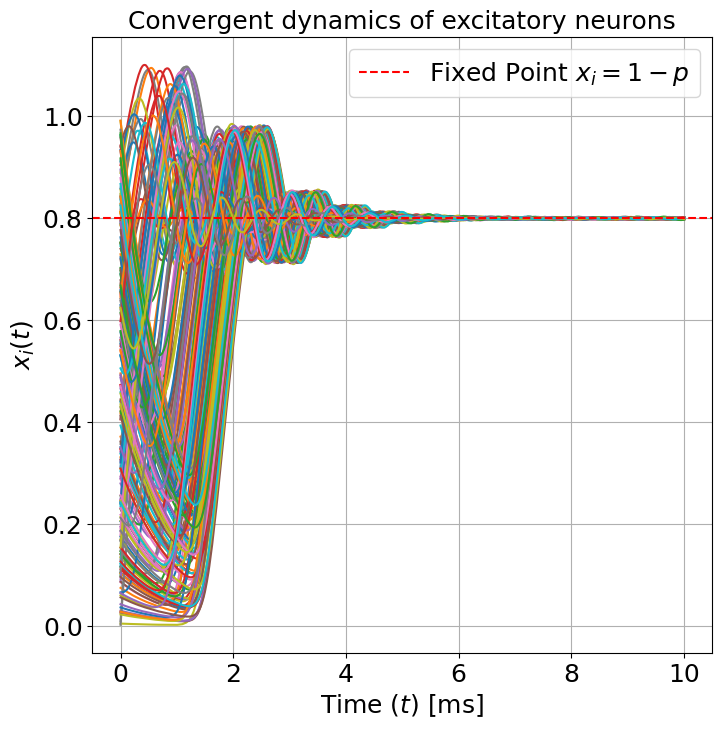

In [4]:
# simulazione della dinamica 

# costruzione dei parametri 
N = L.shape[0] # prendo come indice la dimensione della matrice 
r = 50 # indica interazione a breve distanza (provare ad modificare)
p = 0.2
V = 1e6 #1000 #1e6 # volume del sistema modifica dei parametri per verificare self-oscillations (1000 si iniziano ad intravedere)
dt = 0.001
T = 10
num_steps = int(T / dt)
time = np.linspace(0, T, num_steps)
indices = [1, 2] # funzione di correlazione fra i primi due nodi indicati tramite questo indice 

x, y = simulate_dynamics (N=200) # serve chiamare la funzione che svolge la simulazione della dinamica 


plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, x[:, i])
plt.axhline(y=1 - p, color='r', linestyle='--', label=r'Fixed Point $x_i = 1 - p$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$x_i(t)$", fontsize=18)
plt.title("Convergent dynamics of excitatory neurons", fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.grid(True)
plt.show()



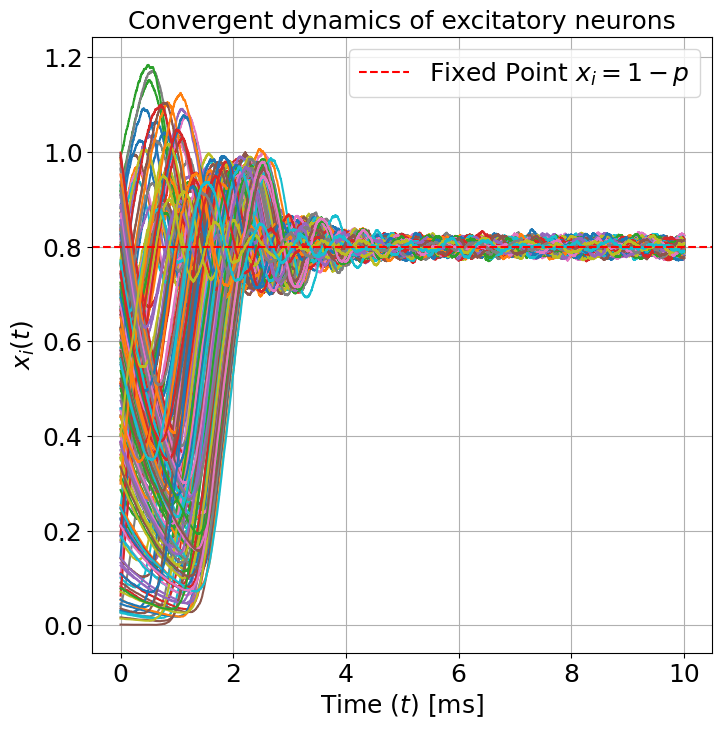

In [5]:
# simulazione della dinamica 

# costruzione dei parametri 
N = L.shape[0] # prendo come indice la dimensione della matrice 
r = 50 # indica interazione a breve distanza (provare ad modificare)
p = 0.2
V = 1e4 #1000 #1e6 # volume del sistema   modifica dei parametri per verificare self-oscillations (1000 si iniziano ad intravedere)
dt = 0.001
T = 10
num_steps = int(T / dt)
time = np.linspace(0, T, num_steps)
indices = [1, 2] # funzione di correlazione fra i primi due nodi indicati tramite questo indice 

x, y = simulate_dynamics (N=200) # serve chiamare la funzione che svolge la simulazione della dinamica 


plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, x[:, i])
plt.axhline(y = 1 - p, color='r', linestyle='--', label=r'Fixed Point $x_i = 1 - p$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$x_i(t)$", fontsize=18)
plt.title("Convergent dynamics of excitatory neurons", fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.grid(True)
plt.show()


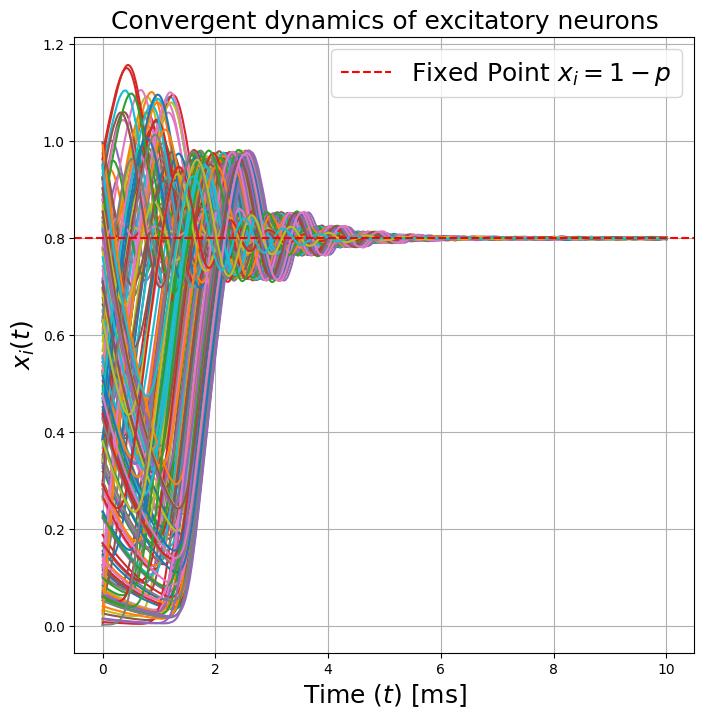

In [6]:
N = L.shape[0] 
r = 50 # indica interazione a breve distanza
p = 0.2
V = 1e6 #1000  # volume del sistema modifica dei parametri per verificare self-oscillations (1000 si iniziano ad intravedere)
dt = 0.001
T = 10

x_1, y_1 = simulate_dynamics(N=200) 

plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, x_1[:, i])
plt.axhline(y = 1 - p, color='r', linestyle='--', label=r'Fixed Point $x_i = 1 - p$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$x_i(t)$", fontsize=18)
plt.title("Convergent dynamics of excitatory neurons", fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()


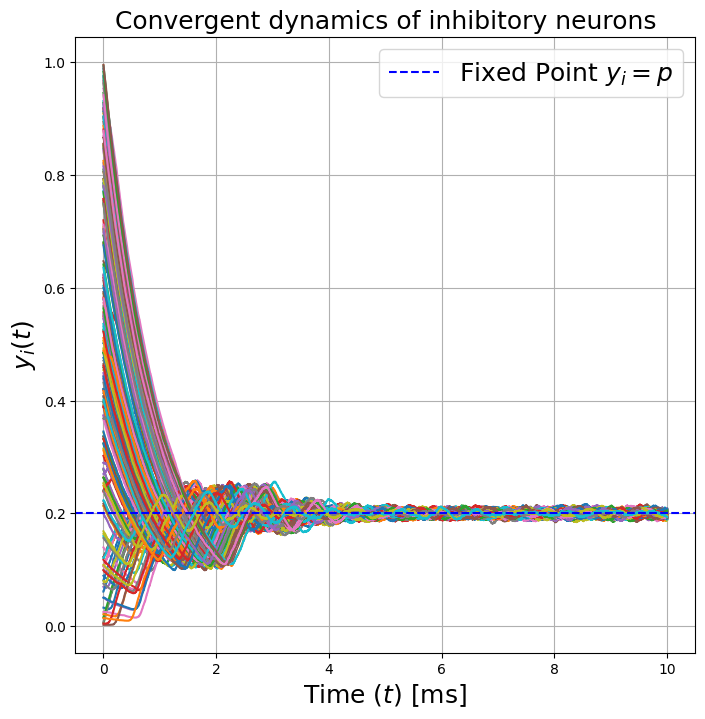

In [7]:
# dinamica per gli inibitori con volume 1e^4

plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, y[:, i])
plt.axhline(y = p, color='b', linestyle='--', label=r'Fixed Point $y_i = p$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$y_i(t)$", fontsize=18)
plt.title("Convergent dynamics of inhibitory neurons", fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

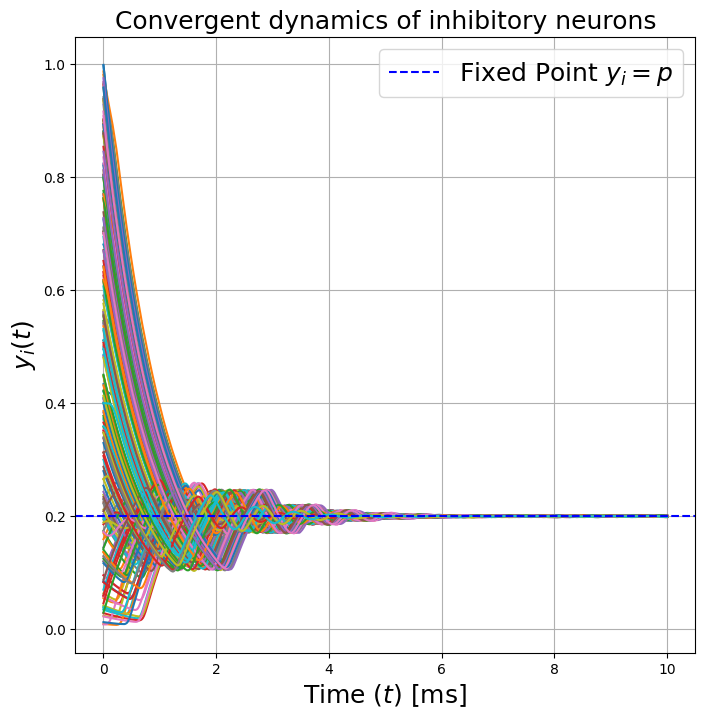

In [8]:


# dinamica per gli inibitori con volume 1e^6

plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, y_1[:, i])
plt.axhline(y = p, color='b', linestyle='--', label=r'Fixed Point $y_i = p$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$y_i(t)$", fontsize=18)
plt.title("Convergent dynamics of inhibitory neurons", fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

In [9]:
# verifico cosa succede se altero la interazione locale (cioè diminuisco il valore di r) 
# simulazione della dinamica 

# costruzione dei parametri 
N = L.shape[0] # prendo come indice la dimensione della matrice 
r = 20 # indica interazione a breve distanza (provare ad modificare)
p = 0.2
V = 1e6 #1000 #1e6 # volume del sistema   modifica dei parametri per verificare self-oscillations (1000 si iniziano ad intravedere)
dt = 0.001
T = 10
num_steps = int(T / dt)
time = np.linspace(0, T, num_steps)
indices = [1, 2] # funzione di correlazione fra i primi due nodi indicati tramite questo indice 

x_2, y_2 = simulate_dynamics (N=200) # serve chiamare la funzione che svolge la simulazione della dinamica 


plt.figure(figsize=(10, 8))
for i in range(N):
    plt.plot(time, x_2[:, i])
plt.axhline(y = 1 - p, color='r', linestyle='--', label=r'Fixed Point $x_i = 1 - p$')
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$x_i(t)$")
plt.title("Convergent dynamics of excitatory neurons")
plt.legend()
plt.grid()
plt.show()


# MODIFICA EFFETTUATA SUL VALORE R (non cambia il punto di fisso ) 

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(N):
    plt.plot(time, y_2[:, i])
plt.axhline(y = p, color='r', linestyle='--', label=r'Fixed Point $y_i = p$')
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$x_i(t)$")
plt.title("Convergent dynamics of inibithory neurons")
plt.legend()
plt.grid()
plt.show()

In [1]:
#correlatori calcolo 

from sympy import sympify, Symbol
import numpy as np

# funzione per importare i dati in formato .txt sostituire dove trova l'espressione r con valore del parametro e restituire la matrice 
def import_and_substitute_matrix(file_path, parameter_value):
    r = Symbol('r')
    matrix = []

    with open(file_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        row = []
        for entry in line.strip().split(','): #ci funge da separatore ed elimina gli spazi superflui (usiamo la virgola come elemento di sep)
            expr = sympify(entry)
            value = float(expr.subs(r, parameter_value))
            row.append(value)
        matrix.append(row)

    return np.array(matrix)


In [2]:

# costruzione della matrice di covarianza 
def covariance_matrix(J, noise_diffusion):
    # Calcolo autovalori/autovettori
    eigenvalues, eigenvectors = np.linalg.eig(J)
    
    # Q (con D matrice di diffusione, responsasbile del rumore sul sistema), COME RIPORTATO SU DISPENSA l^-1 D L^-1^t
    eigenvectors_inv = np.linalg.inv(eigenvectors)
    Q = eigenvectors_inv @ noise_diffusion @ np.conjugate(eigenvectors_inv.T)
    
    # RICAVO ELEMENTI lambda_i lambda_j^* da imporre al denominatore 
    denominator_matrix = eigenvalues[:, None] + np.conjugate(eigenvalues[None, :]) # prendo elementi che stanno in parte reale ed immaginaria 
    
    # M
    M = -Q / denominator_matrix
    
    intermediate_matrix = eigenvectors @ M @ np.conjugate(eigenvectors.T) #è la matrice sigma 
    
    # controllo parte immaginaria degli autovalori 
    max_imaginary = np.max(np.abs(np.imag(intermediate_matrix)))
    if max_imaginary > 1e-5:
        print(f"Warning: Significant imaginary component detected (max = {max_imaginary}).")
    
    # SIGMA (ci interessa solo la parte reale) (parte immaginaria si riferisce a fenomeni di dissipazione FETTER WALESKA)
    sigma = np.real(intermediate_matrix)
    
    return sigma

#ci attendiamo che J abbia autovalori reali ed immaginari -> con quelli immaginari (LImit cycles) dinamica pericolosa 

In [3]:
 # funzione che calcola i correlatori
 
def compute_correlators(J, covariance, indices):
    entry_values = {}  # uso il dizionario per salvare ed organizzare i dati

    index_pairs = list(product(indices, repeat=2))

    for t in time:
        exp_matrix = expm(J * t) @ covariance  # calcola correlatore 
        
        for i, j in index_pairs:
            if (i, j) not in entry_values: # considero il caso in cui non sia presente la coppia
                entry_values[(i, j)] = []  # inizializza la lista relativa alla coppia indicata se non già presente 
                entry_values[(i, j+200)] = []
                entry_values[(i+200, j)] = []
                entry_values[(i+200, j+200)] = []
            entry_values[(i, j)].append(exp_matrix[i-1, j-1])  # prendo gli elementi ad indici diversi 
            entry_values[(i, j+200)].append(exp_matrix[i-1, j+199])
            entry_values[(i+200, j)].append(exp_matrix[j+199, i-1])
            entry_values[(i+200, j+200)].append(exp_matrix[i+199, j+199])

    return entry_values

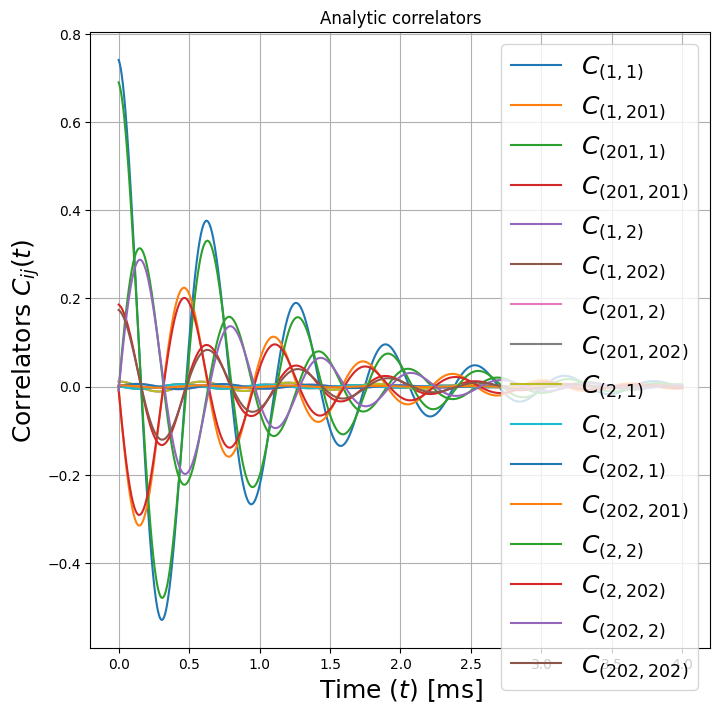

In [6]:
# costruzione del Correlatore al nostro caso 
data_noise_diff = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/CaseB_Laplacian_noiseDiffusion.txt") 

from itertools import product
from scipy.linalg import expm

# normalizzazione ed estrazione di autovalori ed autovettori 
eigvals, eigvecs = np.linalg.eig(data)
max_eigval = np.max(np.real(eigvals))
A_normalized = data / max_eigval

# Laplaciano del sistema (se normalizzato mi aspetto di avere valori 0,1)
L = A_normalized - np.diag(np.sum(A_normalized, axis=1))

# Parameters
N = L.shape[0]
r = 50
p = 0.2
V = 1e6 #dinamica in cui abbiamo convergenza sui punti 
dt = 0.001
T = 4
num_steps = int(T / dt)
time = np.linspace(0, T, num_steps) 
indices = [1, 2] # Indici dei nodi di interesse 

# importo Jacobiana del sistema (Caso B delle note ) + covariance 
Jacobian = import_and_substitute_matrix("C:/Users/fiasc/OneDrive/Desktop/CaseB_Laplacian_Jacobian.txt", r) #come argomenti servono file path e parametro r 
covariance = covariance_matrix(Jacobian, data_noise_diff)

# costruzione del correlatore mediante funzione 
analytic_correlators = {}
analytic_correlators = compute_correlators(Jacobian, covariance, indices)

plt.figure(figsize=(8, 8))
for index, values in analytic_correlators.items(): #una forma del for per considerare valori ed indici associati per il calcolo dei correlatori
    plt.plot(time, values, label=f'$C_{{{index}}}$')
plt.xlabel(r'Time $(t)$ [ms]', fontsize=18)
plt.ylabel(r'Correlators $C_{ij}(t)$', fontsize=18)
plt.title('Analytic correlators')
plt.legend(loc="upper right", fontsize=18)
plt.grid(True)

plt.show()


In [16]:
# costruzione della funzione che calcola response_function (prendo spunto da come fatto per il correlatore) 
# in questo modo più semplice il plotting 

def compute_response_function(J, indices):
    entry_values = {}  # uso il dizionario per salvare ed organizzare i dati

    # genera tutte le combinazioni con gli indici considerando che sono di 2 tipologie 
    index_pairs = list(product(indices, repeat=2))

    for t in time:
        exp_matrix = expm(J * t)  # calcola response function
        
        for i, j in index_pairs:
            if (i, j) not in entry_values: # considero il caso in cui non sia presente la coppia
                entry_values[(i, j)] = []  # inizializza la lista relativa alla coppia indicata se non già presente 
                entry_values[(i, j+200)] = []
                entry_values[(i+200, j)] = []
                entry_values[(i+200, j+200)] = []
            entry_values[(i, j)].append(exp_matrix[i-1, j-1])  # prendo gli elementi ad indici diversi 
            entry_values[(i, j+200)].append(exp_matrix[i-1, j+199])
            entry_values[(i+200, j)].append(exp_matrix[j+199, i-1])
            entry_values[(i+200, j+200)].append(exp_matrix[i+199, j+199])

    return entry_values

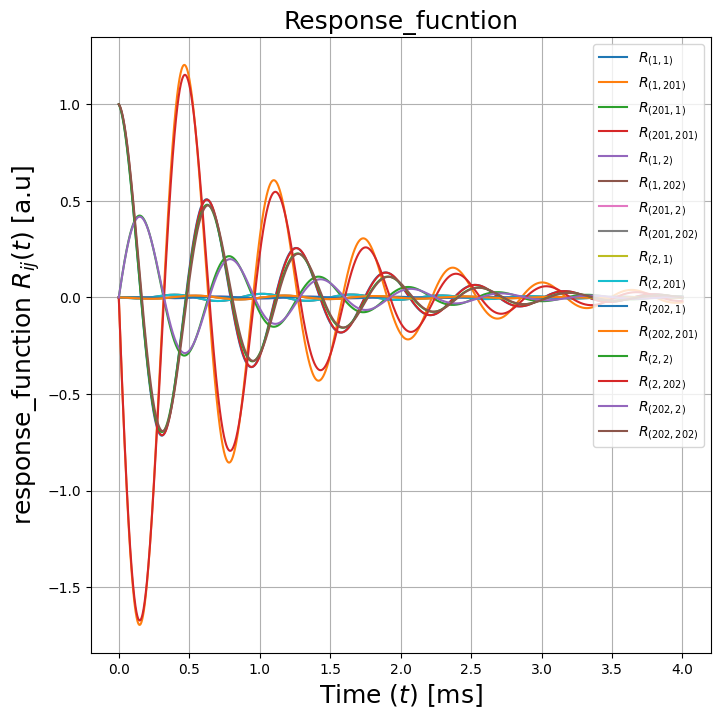

In [18]:
# costruzione della funzione risposta 
# idea è di costruire la funzione che ci calcola la funzione risposta nello stesso modo in cui è costruito il correlatore

from scipy.linalg import expm
from itertools import product
import matplotlib.pyplot as plt

# importo i dati 
data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")

# normalizzazione ed estrazione di autovalori ed autovettori 
eigvals, eigvecs = np.linalg.eig(data)
max_eigval = np.max(np.real(eigvals))
A_normalized = data / max_eigval

# Laplaciano del sistema (se normalizzato mi aspetto di avere valori 0,1)
L = A_normalized - np.diag(np.sum(A_normalized, axis=1))



N = L.shape[0]
r = 50
p = 0.2
V = 1e6 #dinamica in cui abbiamo convergenza sui punti 
dt = 0.001
T = 4

num_steps = int(T / dt)
time = np.linspace(0, T, num_steps) 
indices = [1, 2] # Indici dei nodi di interesse 

Jacobian = import_and_substitute_matrix("C:/Users/fiasc/OneDrive/Desktop/CaseB_Laplacian_Jacobian.txt", r)

#inizializzazione del dizionario 
response_fucntion = {}
response_function = compute_response_function(Jacobian, indices) 

# plotting 
plt.figure(figsize=(8, 8))
for idx, val in response_function.items(): #una forma del for per considerare valori ed indici associati per il calcolo dei correlatori
    plt.plot(time, val, label=f'$R_{{{idx}}}$')
plt.xlabel(r'Time $(t)$ [ms]', fontsize=18)
plt.ylabel(r'response_function $R_{ij}(t)$ [a.u]', fontsize=18)
plt.title('Response_fucntion', fontsize=18)
plt.legend(loc="upper right")
plt.grid(True)

plt.show()



In [19]:
# effettuo anche un confronto con la analitica 

def simulate_dynamics_network_response(N, indices, epsilon, index_perturbation):
    x = np.ones((num_steps, N)) * (1 - p) #riferito ad un punto in cui la dinamica deve arrestarsi (facciamo un riferimento al punto fisso)
    y = np.ones((num_steps, N)) * p

    # Store the trajectories of the selected indices
    x_subset = np.ones((num_steps, len(indices))) * (1 - p)  # idea è di inizializzare con il punto fisso così da avere modo di ricostruire la dinamica come effetto esclusivo della perturbazione 
    y_subset = np.ones((num_steps, len(indices))) * p

    # qua seleziono il nodo da andare a perturbare 
    if 1 <= index_perturbation <= 200: # considero che ci sono vari indici del sistema, ne recupero uno compreso fra 1 e 200
        x[0, index_perturbation-1] += epsilon
    elif 201 <= index_perturbation <= 400: # gli altri indici arrivano da 201 ad 400 andranno a finire in y 
        y[0, index_perturbation-1] += epsilon
    else:
        raise ValueError(f"Index {index} is out of the valid range (1-400)")  

    #si va a lanciare la dinamica del sistema 
    for t in range(1, num_steps):
        for idx, i in enumerate(indices):
            # idx: index in the indices list (e.g., 0, 1, 2 for [10, 50, 100])
            # i: the value at that index (e.g., 10, 50, 100)
            # Perform calculations using i (the actual index, like 10, 50, etc.)

            # ricostruisco la stimolazione nei casi indicati dalla letteratura
            s_x = -r * (y[t-1, i-1] - p) + np.sum(L[i-1, :] * x[t-1, :]) - np.sum(L[i-1, :] * y[t-1, :])
            s_y = r * (x[t-1, i-1] - 1 + p) + np.sum(L[i-1, :] * x[t-1, :]) - np.sum(L[i-1, :] * y[t-1, :])

            # in entrambi i casi raggiungiamo lo stato x, y in base alla attivazione della funzione stessa !
            F_sx = 2 * (1 - p) * F(s_x)
            F_sy = 2 * p * F(s_y)

            # la vediamo come dal punto di vista "discreto" una derivazione discreta 
            x[t, i-1] = x[t-1, i-1] + dt * (F_sx - x[t-1, i-1])
            y[t, i-1] = y[t-1, i-1] + dt * (F_sy - y[t-1, i-1])

            # Storing
            x_subset[t, idx] = x[t, i-1]
            y_subset[t, idx] = y[t, i-1]
    
    return x_subset, y_subset



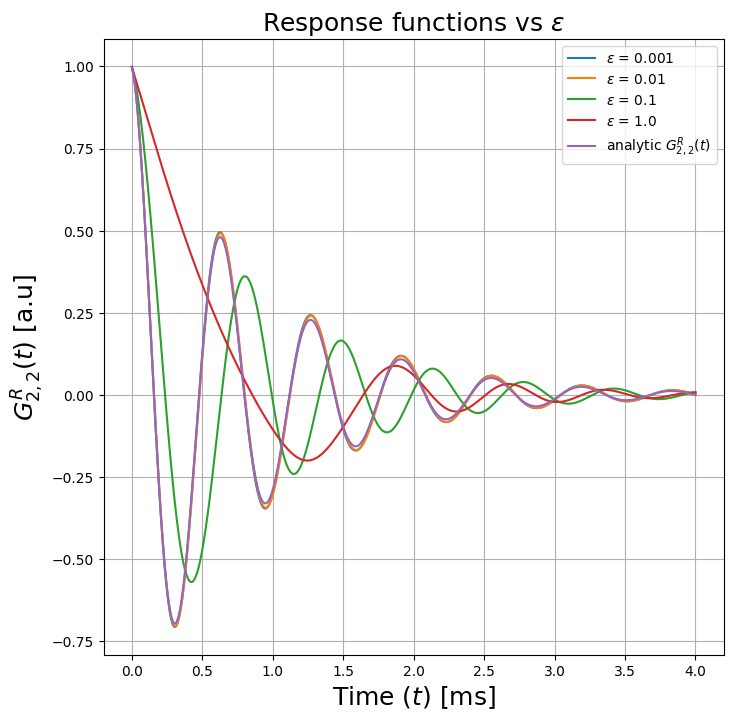

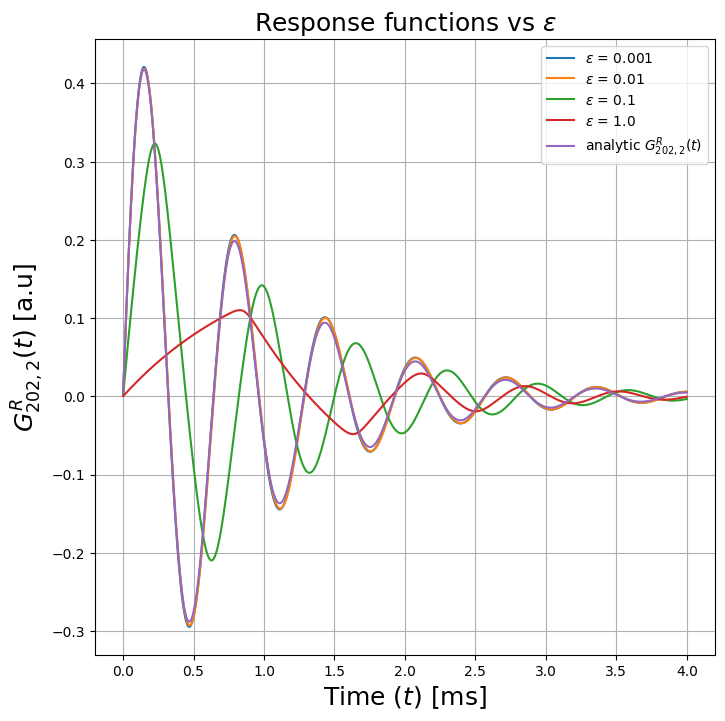

In [20]:
# Parameters
r = 50
N = L.shape[0]
indices = [1, 2] # indici della lista per cui stiamo valutando la risposta
epsilon = np.array([0.001, 0.01, 0.1, 1]) # perturbazione introdotta nel sistema 
index = 2

response_functions = [{} for _ in range(len(epsilon))]  # costruito un dizionario come svolto prima !
for i in range(len(epsilon)):
    for j in indices:
        response_functions[i][(j, index)] = []  # inizializzazione della lista 
        response_functions[i][(j+200, index)] = []

# Run the simulation
for i in range(len(epsilon)):
    x, y = simulate_dynamics_network_response(N, indices, epsilon[i], index)

    # Storing
    for j in range(len(indices)):  # Loop over the number of indices (qua la risposta viene normalizzata per la presenza di un fattore di perturbazione è importante essere adimensionali)
        response_functions[i][(indices[j], index)] = (x[:, j] - 1 + p) / epsilon[i]
        response_functions[i][(indices[j]+200, index)] = (y[:, j] - p) / epsilon[i]

# Plots
plt.figure(figsize=(8, 8))
for i in range(len(epsilon)):
    plt.plot(time[1:], response_functions[i][(2, 2)][1:], label=f"$\epsilon$ = {epsilon[i]}")
plt.plot(time[1:], response_function[(2, 2)][1:], label=f'analytic $G^R_{{2,2}}(t)$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18 )
plt.ylabel(r"$G^R_{2,2}(t)$ [a.u]", fontsize=18)
plt.title("Response functions vs $\epsilon$", fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
for i in range(len(epsilon)):
    plt.plot(time[1:], response_functions[i][(202, 2)][1:], label=f"$\epsilon$ = {epsilon[i]}")
plt.plot(time[1:], response_function[(202, 2)][1:], label=f'analytic $G^R_{{202,2}}(t)$')
plt.xlabel(r"Time ($t$) [ms]", fontsize=18)
plt.ylabel(r"$G^R_{202,2}(t)$ [a.u]", fontsize=18)
plt.title("Response functions vs $\epsilon$", fontsize=18)
plt.legend()
plt.grid(True)
plt.show()